READING AND UNDERSTANDING OF DATASET

In [33]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
advertising = pd.DataFrame(pd.read_csv("/content/advertising.csv"))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


from matplotlib import pyplot as plt
_df_0['TV'].plot(kind='hist', bins=20, title='TV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Radio'].plot(kind='hist', bins=20, title='Radio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Newspaper'].plot(kind='hist', bins=20, title='Newspaper')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='TV', y='Radio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Radio', y='Newspaper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Newspaper', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['TV'].plot(kind='line', figsize=(8, 4), title='TV')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Radio'].plot(kind='line', figsize=(8, 4), title='Radio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Newspaper'].plot(kind='line', figsize=(8, 4), title='Newspaper')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

DATA INSPECTION

In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


DATA CLEANING

In [11]:
# checking Null Values
advertising.isnull().sum()*100/advertising.shape[0]
# There are no null values in the dataset, hence it is clean

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

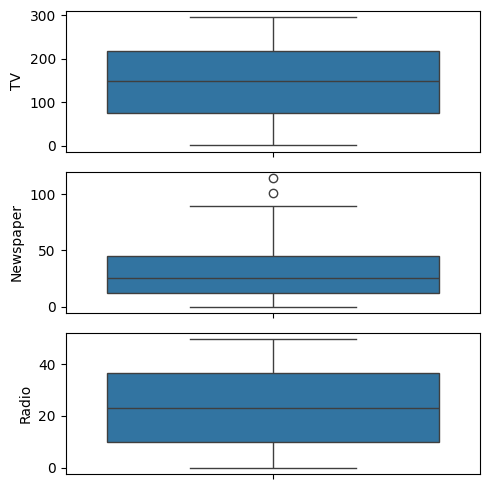

In [14]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt1 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt1 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

THERE ARE NO CONSIDERABLE OUTLIERS PRESENT IN THE DATA

EXPLORATORY DATA ANALYSIS

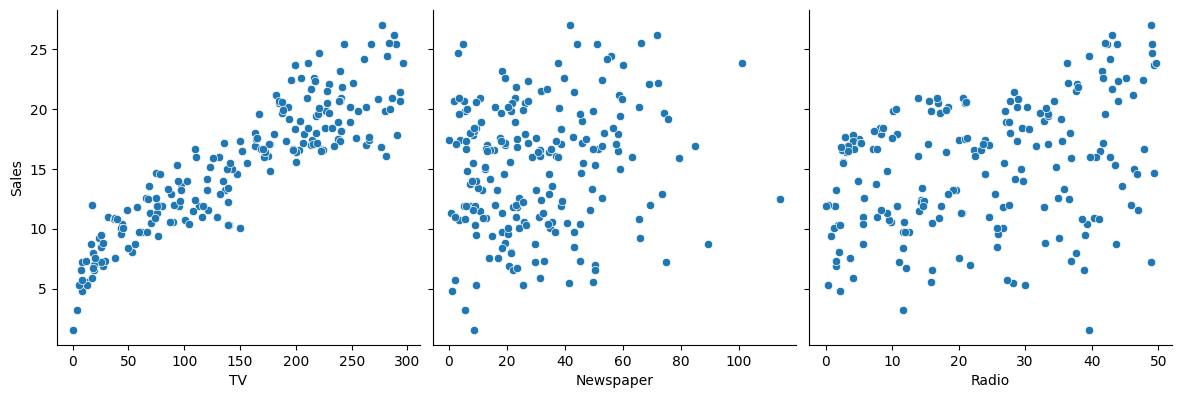

In [15]:
# Let's see how sales are related with other variables using scatter plot
sns.pairplot(advertising, x_vars = ['TV', 'Newspaper', 'Radio'], y_vars= 'Sales', height = 4, aspect = 1, kind = 'scatter')
plt.show()

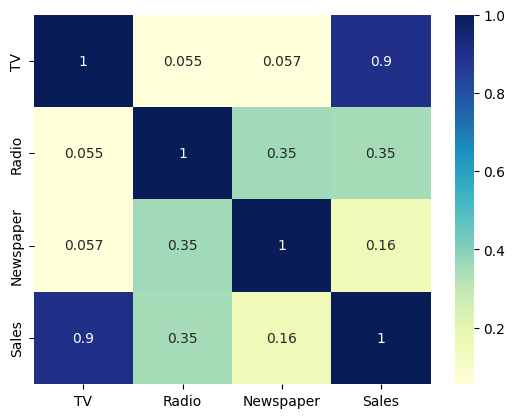

In [16]:
# Let's see the correlation between different variables
sns.heatmap(advertising.corr(), cmap = "YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So, let's go ahead and perform simple linear regression using TV as our feature variable.

PERFORMING SIMPLE LINEAR REGRESSION

In [17]:
x = advertising['TV']
y = advertising['Sales']

TRAIN-TEST SPLIT

You now need to split our variable into training and testing sets. You'll perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset.

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [19]:
# Let's now take a look at the train dataset
x_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [20]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

BUILDING A LINEAR MODEL

In [22]:
import statsmodels.api as sm

In [23]:
# Add a constant to get an intercept
x_train_sm = sm.add_constant(x_train)

# Fit the regression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()

In [24]:
# Print the parameters, i.e the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [25]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           1.52e-52
Time:                        13:39:25   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

LOOKING AT SOME KEY STATISTICS FROM THE SUMMARY

The values are concerned with are:-
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance


### 1. **The coefficients for TV is 0.054, with a very low p value**
The coefficient is statistically significant. So the association is not purely by chance.
### 2. **R-squared is 0.816**
Meaning that 81.6% of the variance in Sales is explained by TV.
This is a decent R-squared value.
### 3. **F statistic has a very low p value (practically low)**
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

The fit is significant. Let's visualise how well the model fit the data.
From the parameters that we get, our linear regression equation becomes:

*Sales = 6.948 + 0.054 x TV*

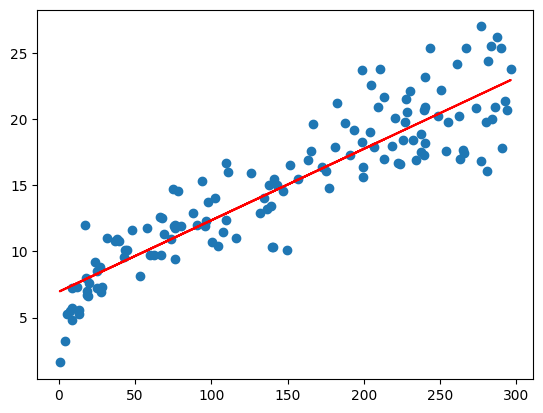

In [26]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054 * x_train, 'r')
plt.show()

**MODEL EVALUATION**

### *Residual analysis*

To validate assumptions of the model, and hence the reliability for inference.

### *Distribution of the error terms*

We need to check if the error terms are also normally distributed(which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [27]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

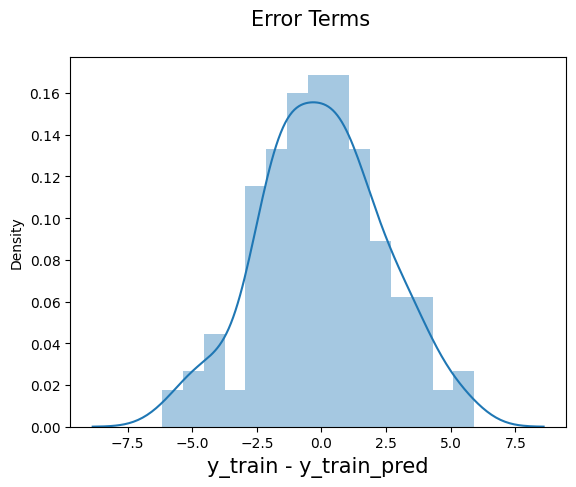

In [29]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)               #Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)      #x-label
plt.show()

The residuals are following the normally distributed with a mean 0.

**Looking for patterns in the residuals.**

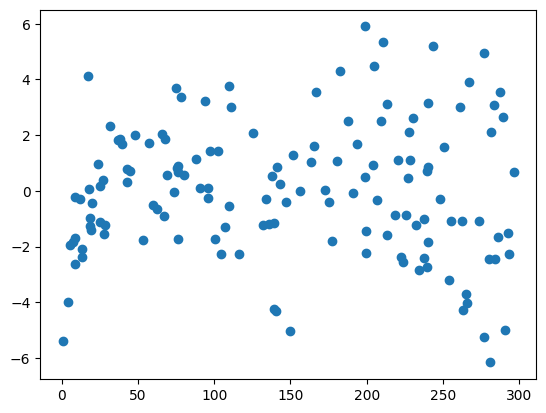

In [30]:
plt.scatter(x_train, res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictives power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data.

**Predictions on the Test Set**

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the x_test data like you did for x_train and then you can simply go on and predict the y values corresponding to x_test using the predict attribute of the fitted regression line.

In [31]:
# Add a constant to x_test
x_test_sm = sm.add_constant(x_test)

# Predict the y values corresponding to x_test_sm
y_pred = lr.predict(x_test_sm)

In [32]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

**LOOKING AT THE RMSE**

In [35]:
# Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

Checking the R-squared on the test set

In [36]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

**Visualizing the fit on the test set**

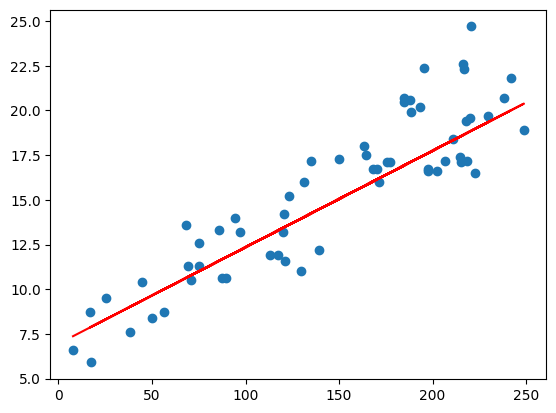

In [37]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.948 + 0.054 * x_test, 'r')
plt.show()